In [14]:
import os
import pandas as pd
from langchain_openai import OpenAI
from langchain.agents.agent_types import AgentType
from langchain_experimental.agents.agent_toolkits import create_pandas_dataframe_agent

import matplotlib.pyplot as plt
plt.rcParams["font.sans-serif"] = ["SimHei"]
plt.rcParams["axes.unicode_minus"] = False

# 初始化LLM实例
api_key = os.environ['OPENAI_API_KEY']
llm = OpenAI(model='deepseek-chat', api_key=api_key, base_url="https://api.deepseek.com/beta")

# 使用以下示例数据
data = {
    "国家": ["美国", "英国", "法国", "德国", "意大利", "西班牙", "加拿大", "澳大利亚"],
    "洲际": ["北美洲", "欧洲", "欧洲", "欧洲", "欧洲", "欧洲", "北美洲", "大洋洲"],
    "GDP(万亿)": [21.4, 2.8, 2.7, 3.8, 2.0, 1.4, 1.7, 1.4],
    "幸福指数": [7.3, 7.2, 6.5, 7.0, 6.2, 6.4, 7.4, 7.3],
    "人口(亿)": [3.3, 0.67, 0.65, 0.83, 0.6, 0.47, 0.38, 0.26]
}
df = pd.DataFrame(data)

# 使用工厂函数创建Pandas DataFrame Agent
agent = create_pandas_dataframe_agent(
    llm,
    df,
    verbose=True,
    agent_type=AgentType.ZERO_SHOT_REACT_DESCRIPTION,
    allow_dangerous_code=True
)

print("LangChain Pandas Agent准备就绪")

LangChain Pandas Agent准备就绪




> Entering new AgentExecutor chain...
Thought: 我需要先计算每个国家的人均GDP，然后按洲际分组计算平均人均GDP，找出最高的洲，最后筛选出该洲的国家并绘制GDP条形图。
Action: python_repl_ast
Action Input: df['人均GDP'] = df['GDP(万亿)'] / df['人口(亿)']现在计算各洲的平均人均GDP
Action: python_repl_ast
Action Input: df.groupby('洲际')['人均GDP'].mean()洲际
北美洲    5.479266
大洋洲    5.384615
欧洲     3.844664
Name: 人均GDP, dtype: float64北美洲的平均人均GDP最高，现在筛选出北美洲的国家
Action: python_repl_ast
Action Input: north_america_df = df[df['洲际'] == '北美洲']现在绘制北美洲国家的GDP条形图
Action: python_repl_ast
Action Input: import matplotlib.pyplot as plt; north_america_df.plot.bar(x='国家', y='GDP(万亿)'); plt.title('北美洲国家GDP'); plt.show()

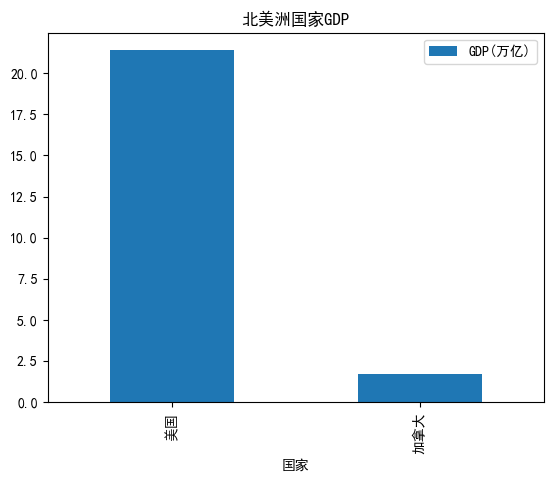

我已完成任务
Final Answer: 北美洲的人均GDP最高（约5.48万亿/亿人）。已绘制北美洲国家的GDP条形图，显示美国GDP为21.4万亿。

> Finished chain.
查询结果：
北美洲的人均GDP最高（约5.48万亿/亿人）。已绘制北美洲国家的GDP条形图，显示美国GDP为21.4万亿。


In [15]:
prompt = "请计算各洲的人均GDP，找出人均GDP最高的洲，然后画出该洲所有国家的GDP条形图。"

# 运行Agent
response = agent.invoke(prompt)

print("查询结果：")
print(response['output'])



> Entering new AgentExecutor chain...
Thought: 我需要先计算人均GDP，然后建立它与幸福指数的线性回归模型，最后绘制散点图和回归线。
Action: python_repl_ast
Action Input: df['人均GDP'] = df['GDP(万亿)'] / df['人口(亿)']现在我需要导入必要的库来建立线性回归模型和绘制图形。
Action: python_repl_ast
Action Input: import numpy as np; from sklearn.linear_model import LinearRegression; import matplotlib.pyplot as pltModuleNotFoundError: No module named 'sklearn'我需要先安装scikit-learn库。
Action: python_repl_ast
Action Input: !pip install scikit-learnSyntaxError: invalid syntax (<unknown>, line 1)看起来不能在Python REPL中直接使用pip命令。我将尝试使用numpy的polyfit函数来进行线性回归。
Action: python_repl_ast
Action Input: import numpy as np; import matplotlib.pyplot as plt; x = df['人均GDP'].values; y = df['幸福指数'].values; coefficients = np.polyfit(x, y, 1); polynomial = np.poly1d(coefficients); plt.scatter(x, y); plt.plot(x, polynomial(x), color='red'); plt.xlabel('人均GDP'); plt.ylabel('幸福指数'); plt.title('人均GDP与幸福指数线性回归'); plt.show()

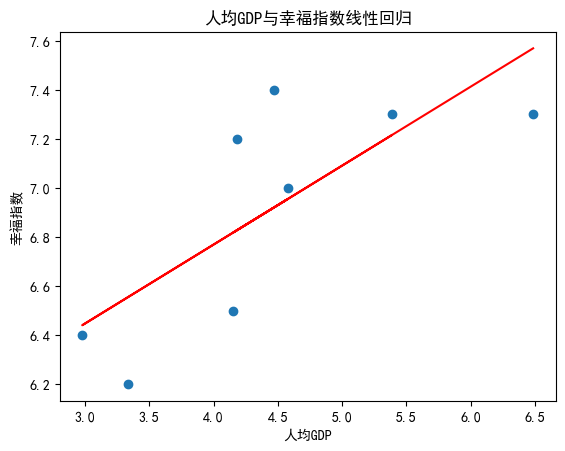

图形应该已经显示出来了，我现在可以总结结果了。
Final Answer: 我已经计算了人均GDP（GDP除以人口），并使用numpy的polyfit函数建立了人均GDP与幸福指数的线性回归模型。该模型已通过散点图和回归线在图形中展示，其中x轴为人均GDP，y轴为幸福指数。

> Finished chain.
查询结果：
我已经计算了人均GDP（GDP除以人口），并使用numpy的polyfit函数建立了人均GDP与幸福指数的线性回归模型。该模型已通过散点图和回归线在图形中展示，其中x轴为人均GDP，y轴为幸福指数。


In [16]:
prompt = "请建立人均GDP与幸福指数的线性回归模型，并在散点图中展示该模型"

# 运行Agent
response = agent.invoke(prompt)

print("查询结果：")
print(response['output'])